In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
# beta distribution
a, b = 2.31, 0.627
rv = sts.beta(a, b)
# sample_size = 1000
N=1000
sample=rv.rvs(N)

In [3]:
# distribution density
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
pdf = rv.pdf(x)

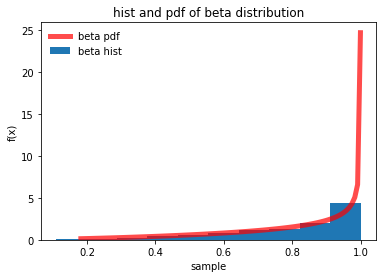

In [4]:
# plot hist
plt.hist(sample, normed=True, label='beta hist')

# plot pdf
plt.plot(x, pdf,'r-', lw=5, alpha=0.7, label='beta pdf')

plt.legend(loc='best', frameon=False)
plt.xlabel('sample')
plt.ylabel('f(x)')
plt.title("hist and pdf of beta distribution")
plt.show()

In [5]:
mean = float(a) / (a + b)
variance = float(a*b) / (a + b)**2 / (a + b + 1)
print("Mean: ", mean)
print("Variance: ", variance)

('Mean: ', 0.7865168539325842)
('Variance: ', 0.04264874077027537)


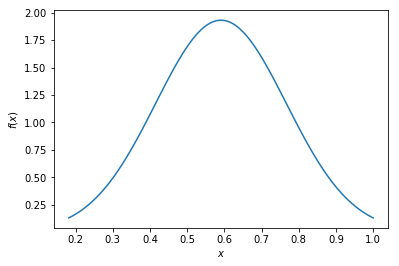

In [6]:
# norm distribution variance
norm_variance = math.sqrt(variance)
norm_rv = sts.norm(mean, norm_variance)
norm_x = np.linspace(norm_rv.ppf(0.01), norm_rv.ppf(0.99), 100)
norm_pdf = norm_rv.pdf(norm_x)
plt.plot(x, norm_pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

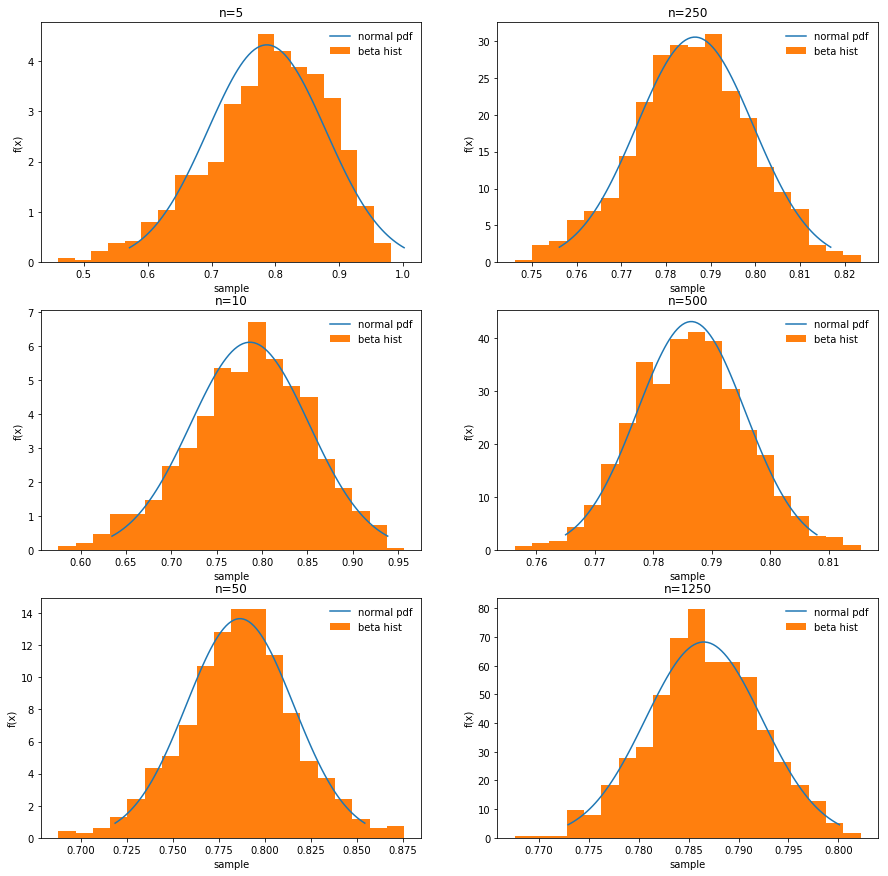

In [7]:
f, axarr = plt.subplots(nrows=3, ncols=2)
f.set_figheight(15)
f.set_figwidth(15)

# samples count
qty=1000
# size of samples
for ax_n,n in enumerate([5,10,50,250,500,1250]):

    means = list()
    for i in range(qty):
        # sample of size n
        sample = rv.rvs(n)
        # calc sample mean (выборочное среднее)
        means.append(np.mean(sample))
    norm_variance = math.sqrt(variance/n)
    norm_rv = sts.norm(mean, norm_variance)
    norm_x = np.linspace(norm_rv.ppf(0.01), norm_rv.ppf(0.99), 100)
    norm_pdf = norm_rv.pdf(norm_x)
    
    # plot hist for sample of size n
    ax_row=ax_n%3
    ax_col=int(ax_n/3)
    axarr[ax_row,ax_col].plot(norm_x,norm_pdf,label='normal pdf')
    axarr[ax_row,ax_col].hist(means,bins=int(qty/50),normed=True,label='beta hist')
    axarr[ax_row,ax_col].set_title("n="+str(n))
    axarr[ax_row,ax_col].set_xlabel('sample')
    axarr[ax_row,ax_col].set_ylabel('f(x)')
    axarr[ax_row,ax_col].legend(loc='best', frameon=False)
    
plt.show()

Вывод:
Распределение выборочных средних представляет собой нормальное распределение с указанными параметрами, в чем можно убедиться по данным графикам. Мы построили гистограмму данных бета-распределения и график плотности вероятности нормального распределения при разных объемах выборки. Можем видеть, что плотность вероятности достаточно точно оценивается, причем с ростом объема выборки точность аппроксимации улучшается.